Primeiras linhas do conjunto de dados:
  Estado   Ano  Area_Plantada  Preco_Soja  Precipitacao  Producao_Soja
0     SP  2015           1360       76.51        205.94     834.711292
1     SP  2016           4926      101.33        116.74   20673.153503
2     SP  2017           3419      123.73         54.12    6003.351958
3     SP  2018           1684       87.38        154.95    2170.181952
4     SP  2019           3404       86.21        172.37    4613.037785


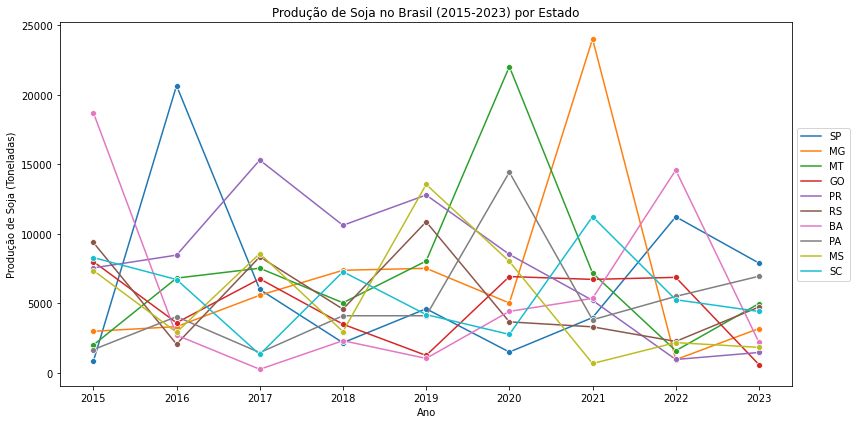

MAE (Erro Médio Absoluto): 2311.09 toneladas
R² (Coeficiente de Determinação): 0.17


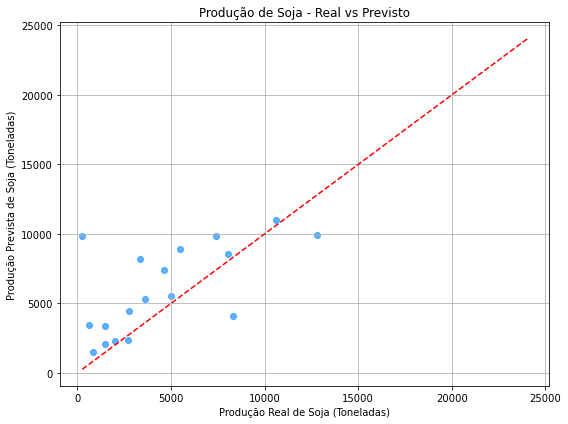

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Etapa 1: Gerar dados fictícios sobre produção de soja no Brasil
np.random.seed(42)

# Fatores: Área Plantada (mil hectares), Preço Soja (R$/saca), Precipitação (mm/mês)
estados = ['SP', 'MG', 'MT', 'GO', 'PR', 'RS', 'BA', 'PA', 'MS', 'SC']
anos = list(range(2015, 2024))
dados = []

for estado in estados:
    for ano in anos:
        area_plantada = np.random.randint(500, 5000)  # área plantada em mil hectares
        preco_soja = round(np.random.uniform(60, 150), 2)  # preço da soja (R$/saca)
        precipitacao = round(np.random.uniform(50, 250), 2)  # precipitação média mensal (mm/mês)
        
        # Produção estimada de soja (em toneladas)
        producao_soja = (area_plantada * preco_soja * np.random.normal(0.02, 0.01))  # fórmula fictícia de produção
        producao_soja = max(producao_soja, 0)  # Garantir que a produção não seja negativa
        
        dados.append([estado, ano, area_plantada, preco_soja, precipitacao, producao_soja])

# Criar o DataFrame
df = pd.DataFrame(dados, columns=['Estado', 'Ano', 'Area_Plantada', 'Preco_Soja', 'Precipitacao', 'Producao_Soja'])

# Etapa 2: Análise exploratória dos dados
print("Primeiras linhas do conjunto de dados:")
print(df.head())

# Gráfico de produção de soja por estado e ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Ano', y='Producao_Soja', hue='Estado', marker='o')
plt.title("Produção de Soja no Brasil (2015-2023) por Estado")
plt.ylabel("Produção de Soja (Toneladas)")
plt.xlabel("Ano")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Etapa 3: Pré-processamento dos dados
# Remover valores ausentes (caso existam)
df.dropna(inplace=True)

# Separação das variáveis independentes (X) e da variável dependente (y)
X = df[['Area_Plantada', 'Preco_Soja', 'Precipitacao']]
y = df['Producao_Soja']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização dos dados (opcional, mas importante para alguns modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Etapa 4: Construção do modelo de regressão
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Etapa 5: Previsões e avaliação do modelo
y_pred = modelo.predict(X_test_scaled)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erro Médio Absoluto): {mae:.2f} toneladas")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# Etapa 6: Visualização - Real vs Previsto
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Produção Real de Soja (Toneladas)")
plt.ylabel("Produção Prevista de Soja (Toneladas)")
plt.title("Produção de Soja - Real vs Previsto")
plt.grid(True)
plt.tight_layout()
plt.show()